In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = pd.read_csv('train.csv')
data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


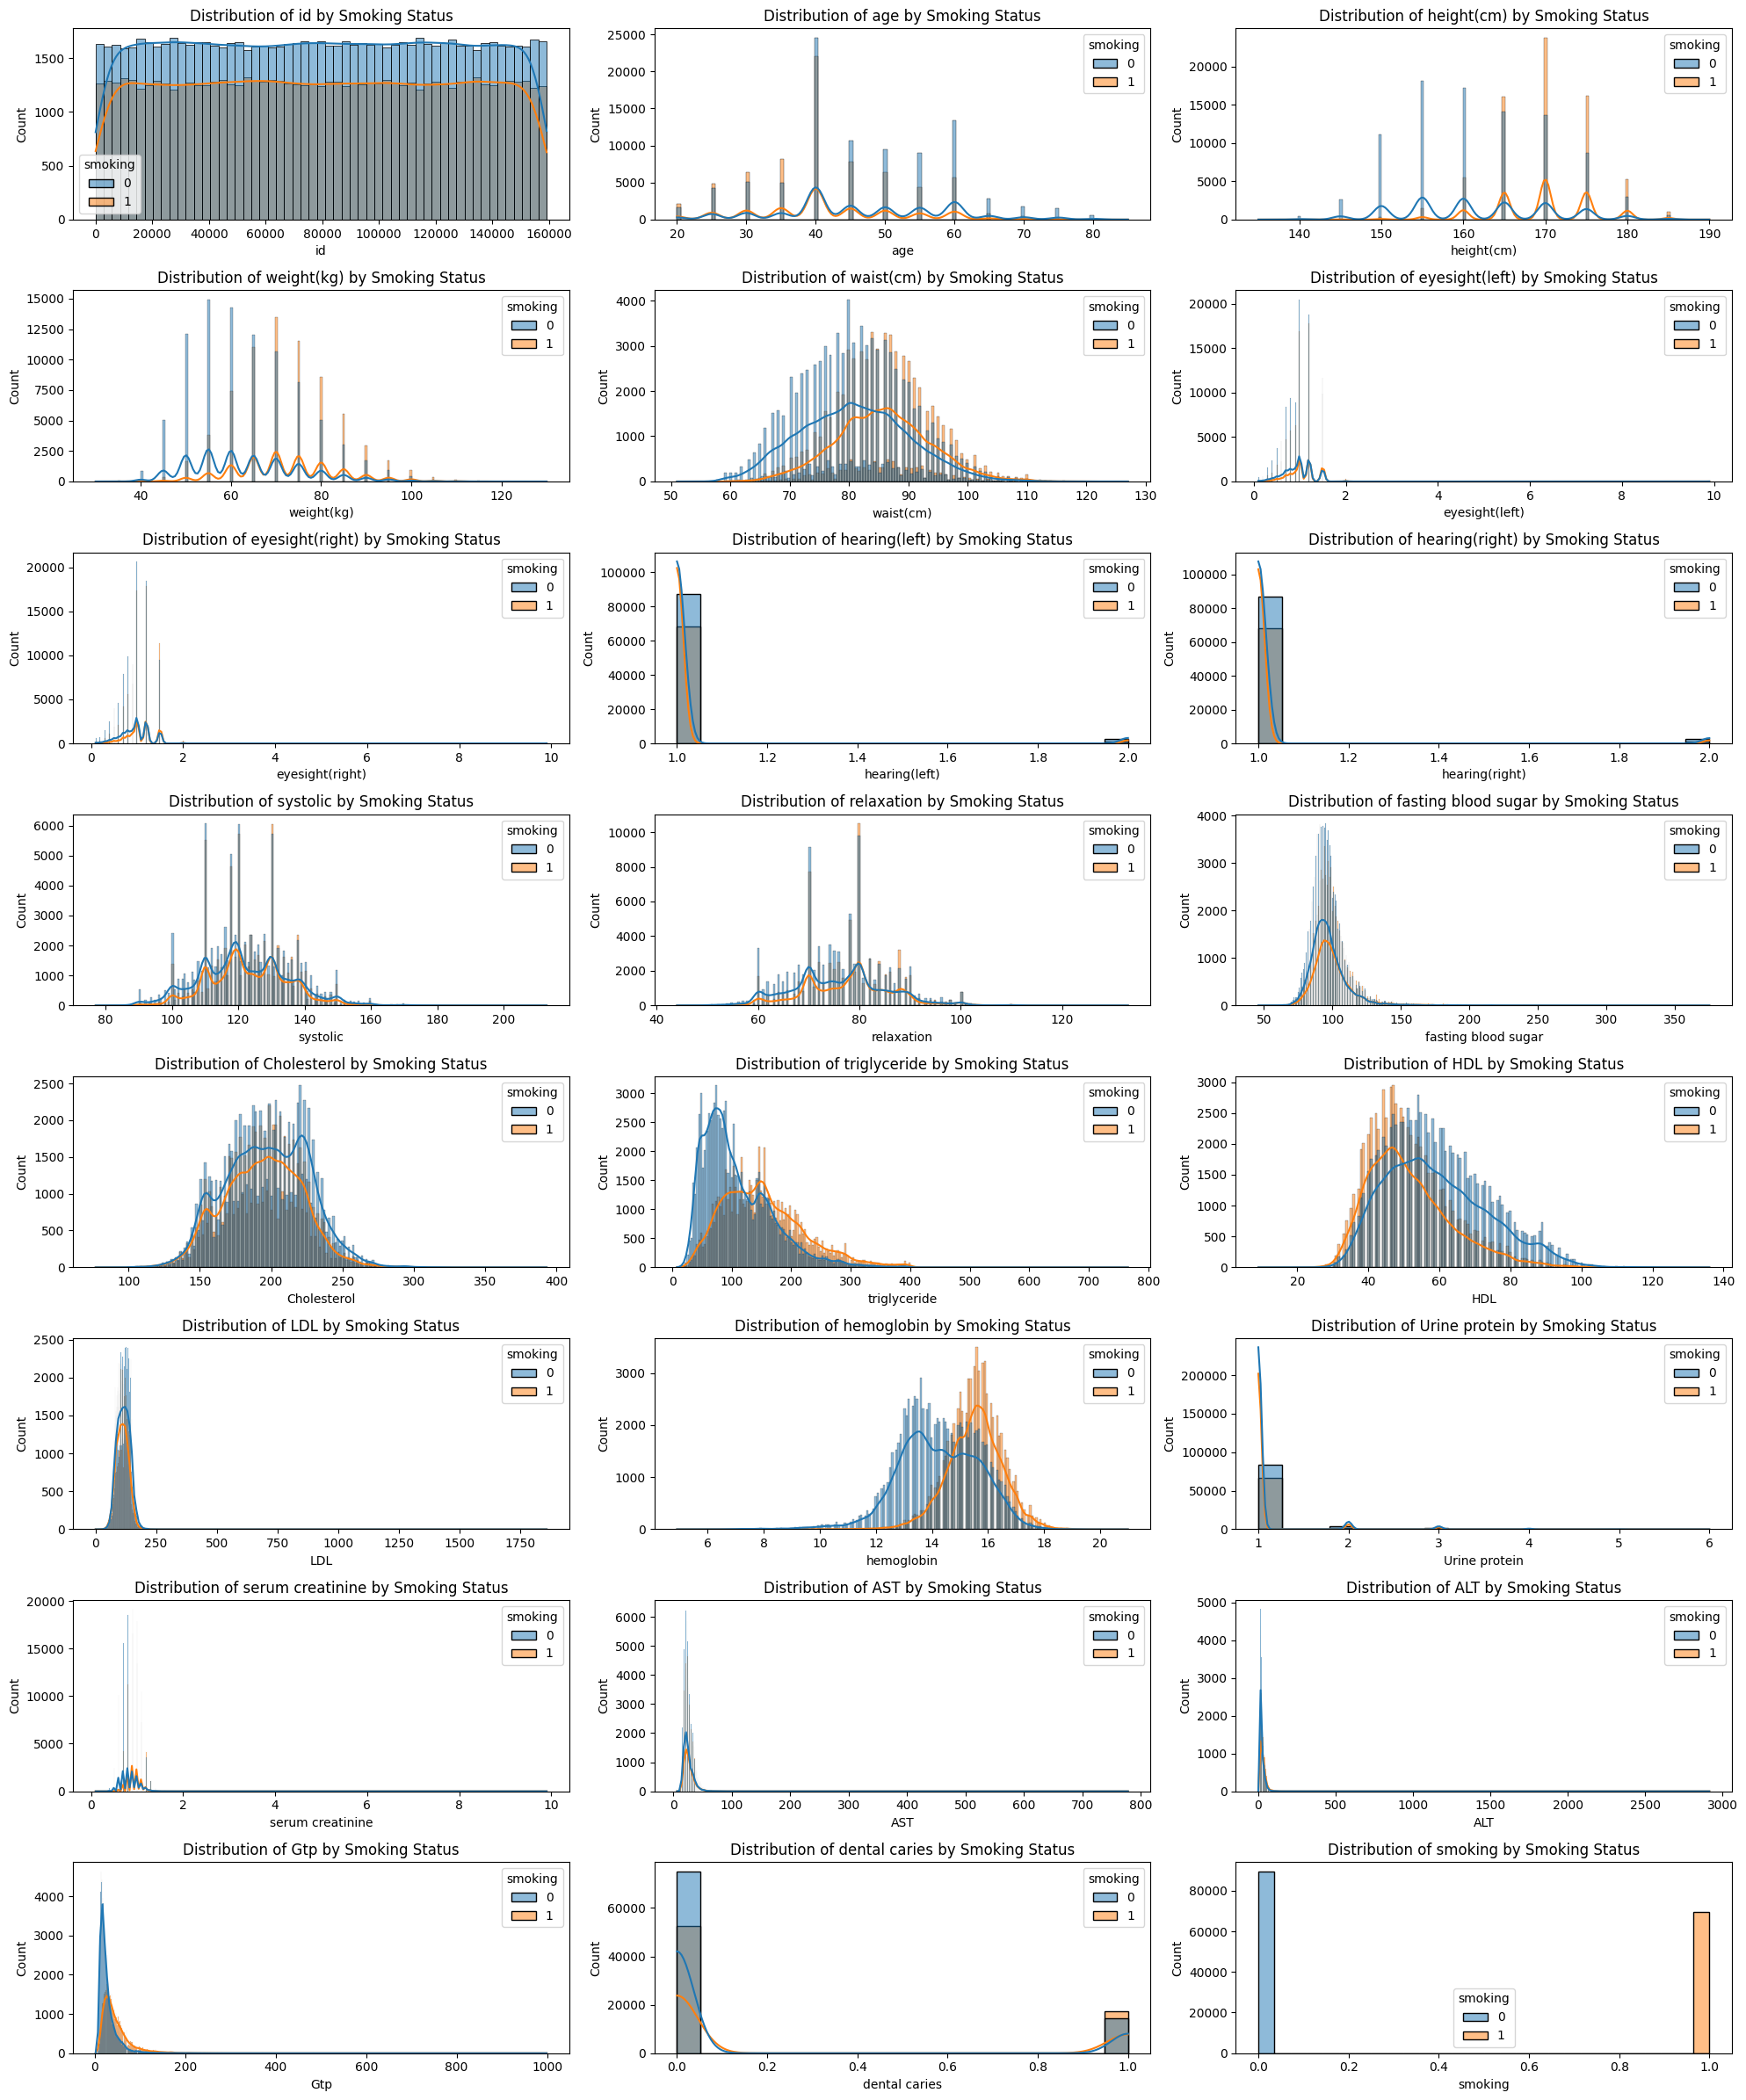

In [22]:
plt.figure(figsize=(20, 24))
num_rows = 8
num_cols = 3

for i, column in enumerate(data.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=data, x=column, hue='smoking', kde=True)
    plt.title(f'Distribution of {column} by Smoking Status')

plt.tight_layout()
plt.show()

In [23]:
# it is very clear from the distributions that a person who smokes has much lower indicators,
# and you can clearly see the difference between a smoker and a non-smoker
# the data is not normally distributed, so we need to do some transformation
# Data Preprocessing

In [24]:
'''# Age
data['age'] = (np.round(data['age'] / 5) * 5).astype(int)
# height(cm)
data['height(cm)'] = (np.round(data['height(cm)'] / 5) * 5).astype(int)
# weight(kg) don't believe in the data 30 kg - 14 people
data['weight(kg)'] = (np.round(data['weight(kg)'] / 5) * 5).astype(int)
# waist(cm)
data['waist(cm)'] = data['waist(cm)'].round().astype(int)
# eyesight(left), eyesight(right)
data[['eyesight(left)', 'eyesight(right)']] = data[['eyesight(left)', 'eyesight(right)']].applymap(lambda x: x if x <= 2.0 else pd.NA)
data[['eyesight(left)', 'eyesight(right)']] = data[['eyesight(left)', 'eyesight(right)']].fillna(method='ffill')
# systolic
data['systolic'] = (data['systolic'] // 5) * 5
# relaxation
data['relaxation']=(data['relaxation'] // 5) * 5
# fasting blood sugar
quantile_99 = data['fasting blood sugar'].quantile(0.99)
data['fasting blood sugar'] = data['fasting blood sugar'].apply(lambda x: x if x <= quantile_99 else pd.NA)
data['fasting blood sugar'] = data['fasting blood sugar'].fillna(method='ffill')
# triglyceride
data['triglyceride'] = (data['triglyceride'] // 5) * 5
# serum creatinine
data['serum creatinine'] = data['serum creatinine'].apply(lambda x: x if x <= 3.0 else pd.NA)
data['serum creatinine'] = data['serum creatinine'].fillna(method='ffill')
# AST
AST_quantile_99 = data['AST'].quantile(0.99)
data['AST'] = data['AST'].apply(lambda x: x if x <= AST_quantile_99 else pd.NA)
data['AST'] = data['AST'].fillna(method='ffill')
# ALT
ALT_quantile_99 = data['ALT'].quantile(0.99)
data['ALT'] = data['ALT'].apply(lambda x: x if x <= ALT_quantile_99 else pd.NA)
data['ALT'] = data['ALT'].fillna(method='ffill')
# Gtp
Gtp_quantile_99 = data['ALT'].quantile(0.99)
data['Gtp'] = data['Gtp'].apply(lambda x: x if x <= Gtp_quantile_99 else pd.NA)
data['Gtp'] = data['Gtp'].fillna(method='ffill')'''

"# Age\ndata['age'] = (np.round(data['age'] / 5) * 5).astype(int)\n# height(cm)\ndata['height(cm)'] = (np.round(data['height(cm)'] / 5) * 5).astype(int)\n# weight(kg) don't believe in the data 30 kg - 14 people\ndata['weight(kg)'] = (np.round(data['weight(kg)'] / 5) * 5).astype(int)\n# waist(cm)\ndata['waist(cm)'] = data['waist(cm)'].round().astype(int)\n# eyesight(left), eyesight(right)\ndata[['eyesight(left)', 'eyesight(right)']] = data[['eyesight(left)', 'eyesight(right)']].applymap(lambda x: x if x <= 2.0 else pd.NA)\ndata[['eyesight(left)', 'eyesight(right)']] = data[['eyesight(left)', 'eyesight(right)']].fillna(method='ffill')\n# systolic\ndata['systolic'] = (data['systolic'] // 5) * 5\n# relaxation\ndata['relaxation']=(data['relaxation'] // 5) * 5\n# fasting blood sugar\nquantile_99 = data['fasting blood sugar'].quantile(0.99)\ndata['fasting blood sugar'] = data['fasting blood sugar'].apply(lambda x: x if x <= quantile_99 else pd.NA)\ndata['fasting blood sugar'] = data['fasting 

In [25]:
def preprocess_data(input_data):
    # Age
    input_data['age'] = (np.round(input_data['age'] / 5) * 5).astype(int)
    # height(cm)
    input_data['height(cm)'] = (np.round(input_data['height(cm)'] / 5) * 5).astype(int)
    # weight(kg)
    input_data['weight(kg)'] = (np.round(input_data['weight(kg)'] / 5) * 5).astype(int)
    # waist(cm)
    input_data['waist(cm)'] = input_data['waist(cm)'].round().astype(int)
    # eyesight(left), eyesight(right)
    input_data[['eyesight(left)', 'eyesight(right)']] = input_data[['eyesight(left)', 'eyesight(right)']].map(lambda x: x if x <= 2.0 else pd.NA)
    input_data[['eyesight(left)', 'eyesight(right)']] = input_data[['eyesight(left)', 'eyesight(right)']].ffill()
    # systolic
    input_data['systolic'] = (input_data['systolic'] // 5) * 5
    # relaxation
    input_data['relaxation'] = (input_data['relaxation'] // 5) * 5
    # fasting blood sugar
    quantile_99 = input_data['fasting blood sugar'].quantile(0.99)
    input_data['fasting blood sugar'] = input_data['fasting blood sugar'].map(lambda x: x if x <= quantile_99 else pd.NA)
    input_data['fasting blood sugar'] = input_data['fasting blood sugar'].ffill()
    # triglyceride
    input_data['triglyceride'] = (input_data['triglyceride'] // 5) * 5
    # serum creatinine
    input_data['serum creatinine'] = input_data['serum creatinine'].map(lambda x: x if x <= 3.0 else pd.NA)
    input_data['serum creatinine'] = input_data['serum creatinine'].ffill()
    # AST
    AST_quantile_99 = input_data['AST'].quantile(0.99)
    input_data['AST'] = input_data['AST'].map(lambda x: x if x <= AST_quantile_99 else pd.NA)
    input_data['AST'] = input_data['AST'].ffill()
    # LDL
    LDL_quantile_99 = input_data['LDL'].quantile(0.99)
    input_data['LDL'] = input_data['LDL'].map(lambda x: x if x <= LDL_quantile_99 else pd.NA)
    input_data['LDL'] = input_data['LDL'].ffill()
    # ALT
    ALT_quantile_99 = input_data['ALT'].quantile(0.99)
    input_data['ALT'] = input_data['ALT'].map(lambda x: x if x <= ALT_quantile_99 else pd.NA)
    input_data['ALT'] = input_data['ALT'].ffill()
    # Gtp
    Gtp_quantile_99 = input_data['Gtp'].quantile(0.99)
    input_data['Gtp'] = input_data['Gtp'].map(lambda x: x if x <= Gtp_quantile_99 else pd.NA)
    input_data['Gtp'] = input_data['Gtp'].ffill()
    
    return input_data


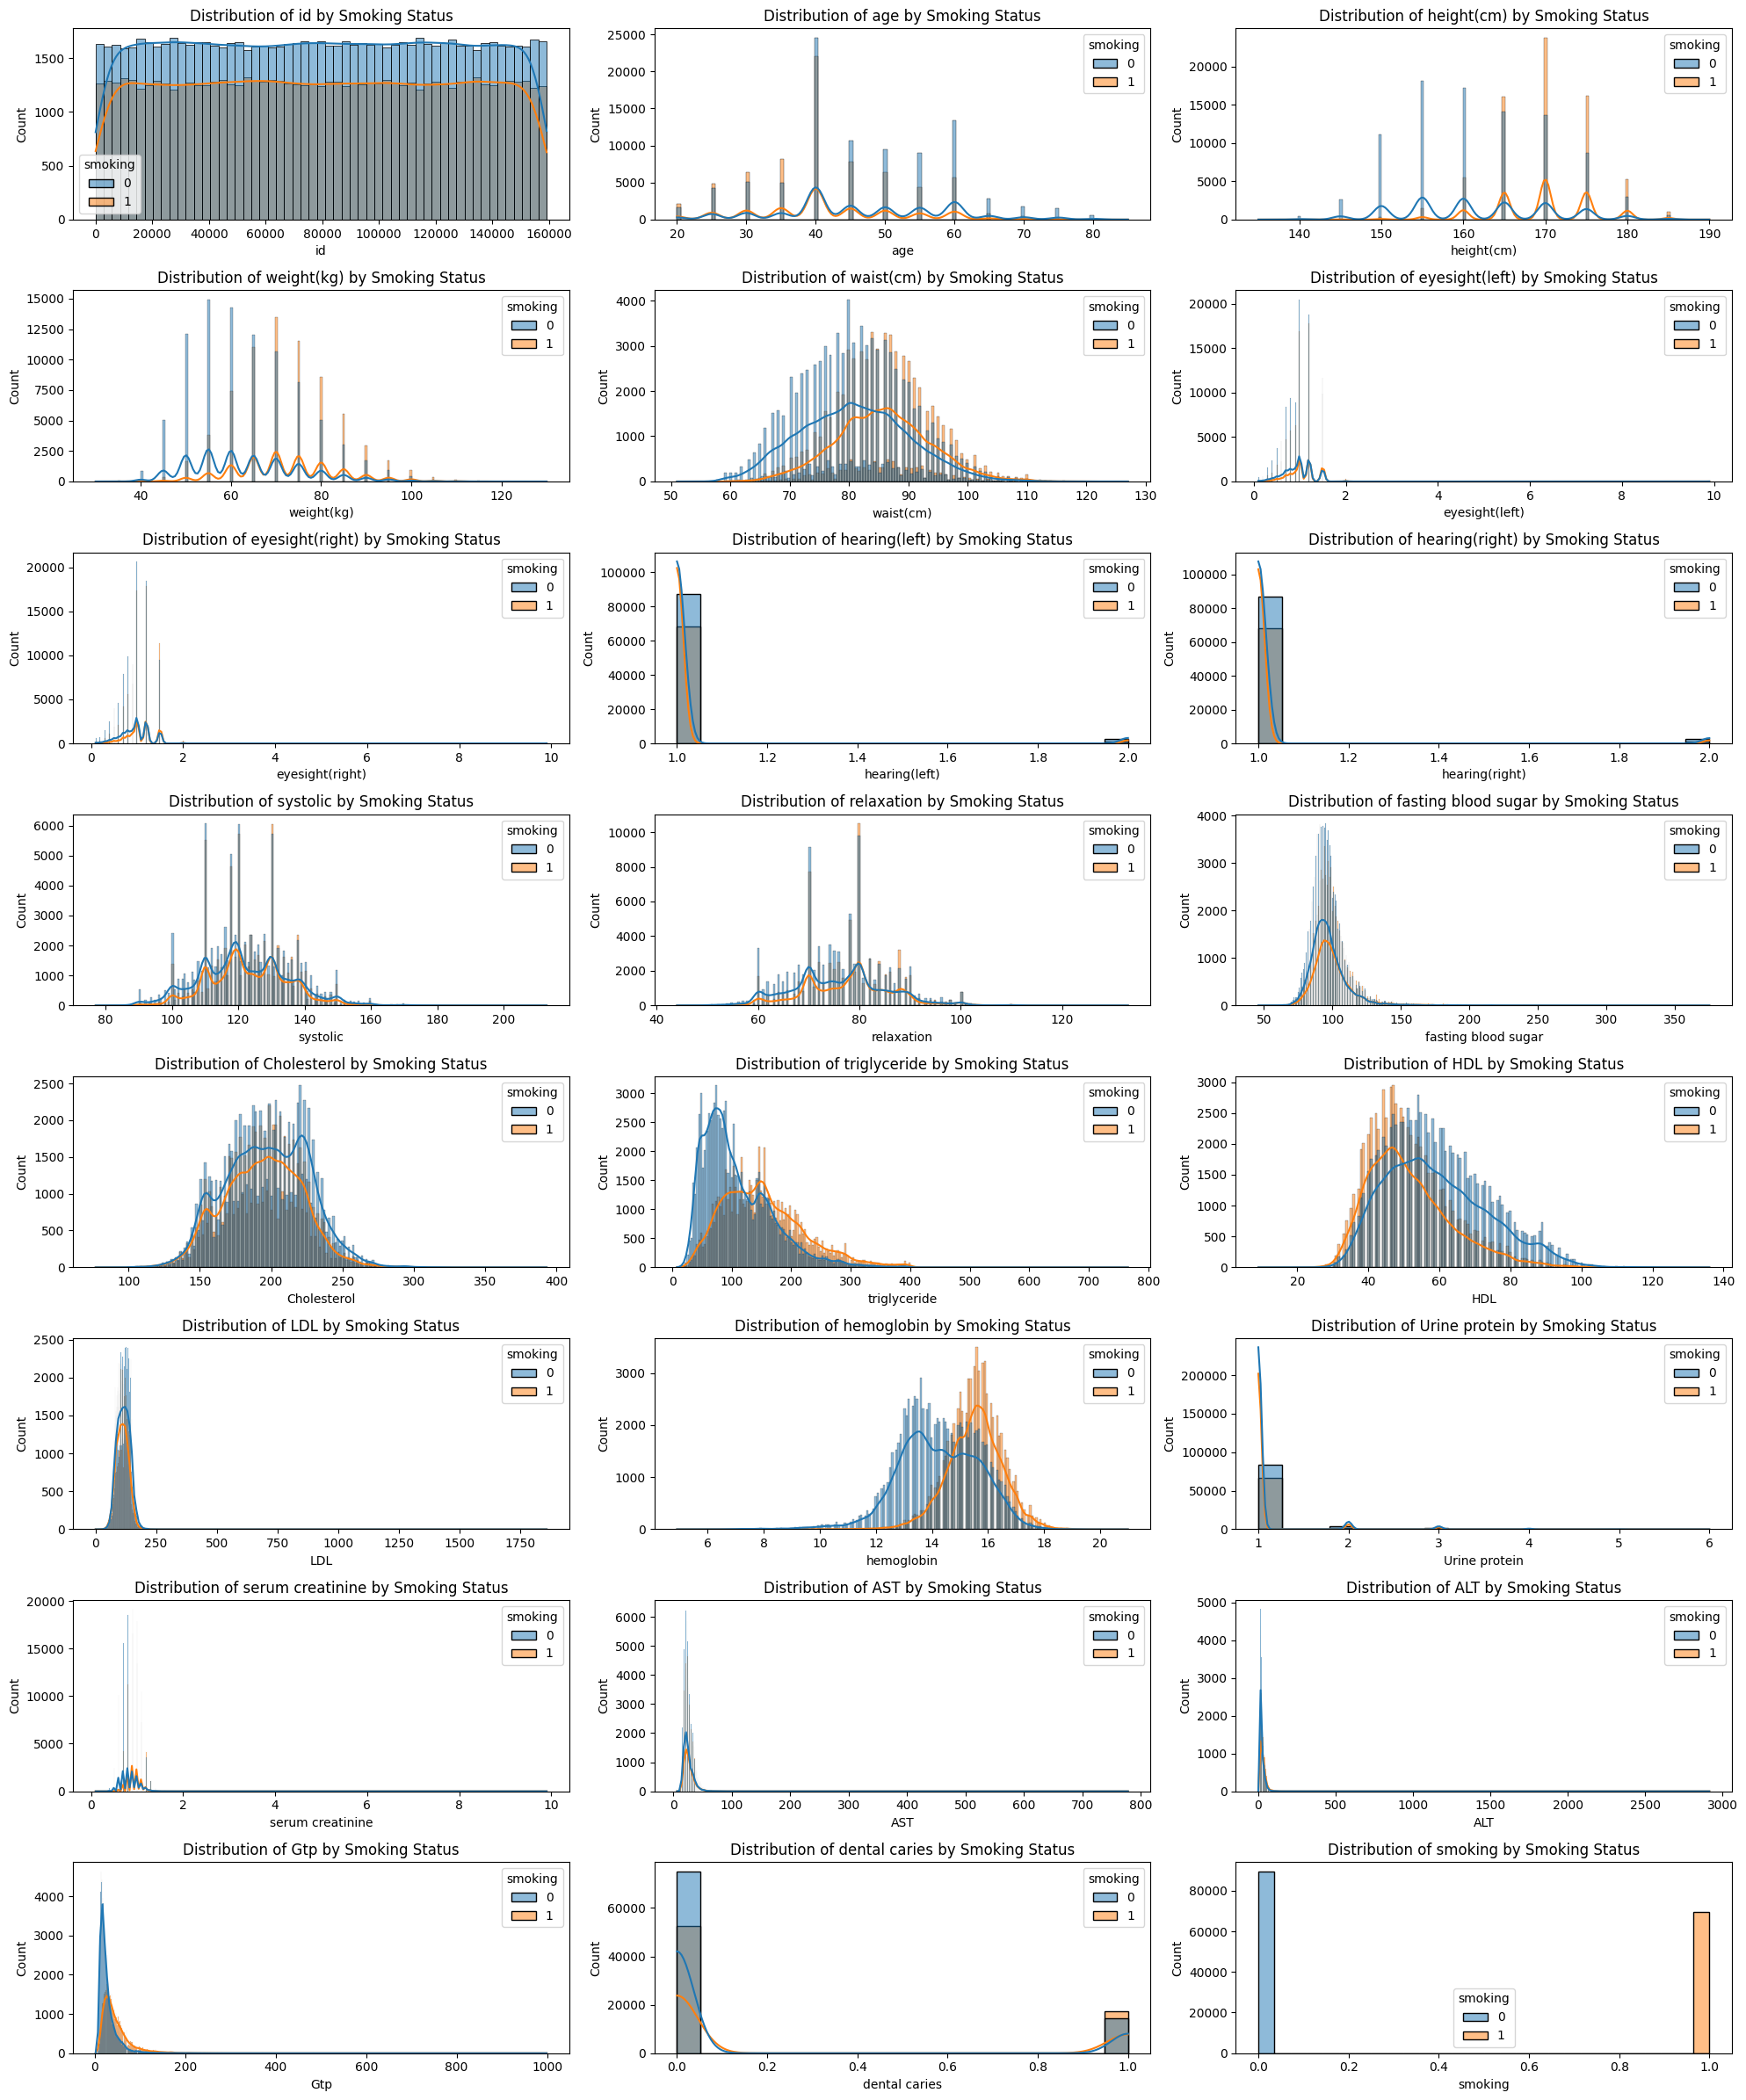

In [26]:
# after preprocessing
plt.figure(figsize=(20, 24))
num_rows = 8
num_cols = 3

for i, column in enumerate(data.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=data, x=column, hue='smoking', kde=True)
    plt.title(f'Distribution of {column} by Smoking Status')

plt.tight_layout()
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
data = preprocess_data(data)
X=data.drop(['smoking'], axis=1)
y=data['smoking']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 77.36%


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("The best parameters:", best_params)
print("Best rating:", best_score)

The best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best rating: 0.7778594937424927


In [30]:
best_model = grid_search.best_estimator_

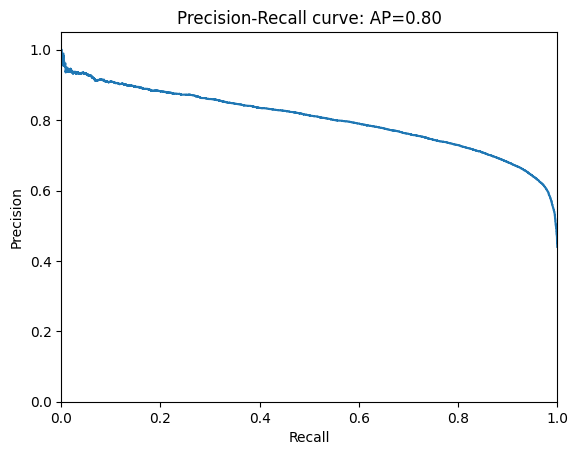

In [31]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test, best_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

In [54]:
data_1=pd.read_csv('test.csv')
ids = data_1['id'].to_numpy()
data_1 = preprocess_data(data_1)
data_1 = scaler.transform(data_1)
y_pred = best_model.predict(data_1)
df = pd.DataFrame({'id': ids, 'smoking': y_pred})
df.to_csv('submission.csv', index=False)